In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from copy import deepcopy

seed = 777

In [ ]:
w1 = np.arange(-6, 6, 0.1)
w2 = np.arange(-6, 6, 0.1)
w1_grid, w2_grid = np.meshgrid(w1, w2)
z_l1_norm = np.abs(w1_grid) + np.abs(w2_grid)
z_l2_norm = (np.abs(w1_grid)**2 + np.abs(w2_grid)**2)**(1/2)
z_l3_norm = (np.abs(w1_grid)**3 + np.abs(w2_grid)**3)**(1/3)
z_linf_norm = np.maximum(np.abs(w1_grid), np.abs(w2_grid))
#Use latex in matplotlib plots
plt.rc('text', usetex=True)

print(z_l1_norm)

fig, ax = plt.subplots(1, 4, figsize=(15, 4))
cs1 = ax[0].contour(w1_grid, w2_grid, z_l1_norm, levels=np.arange(1, 6, 1))
ax[0].set_xlabel('w1')
ax[0].set_ylabel('w2')
ax[0].set_yticks(np.arange(-6, 6, 1))
ax[0].set_xticks(np.arange(-6, 6, 1))
ax[0].clabel(cs1, inline=True, fontsize=10)
ax[0].set_title('Level sets for 1-norm $||w||_1 = |w_1| + |w_2|$')
cs2 = ax[1].contour(w1_grid, w2_grid, z_l2_norm, levels=np.arange(1, 6, 1))
ax[1].set_xlabel('w1')
ax[1].set_ylabel('w2')
ax[1].set_yticks(np.arange(-6, 6, 1))
ax[1].set_xticks(np.arange(-6, 6, 1))
ax[1].clabel(cs2, inline=True, fontsize=10)
ax[1].set_title('Level sets for 2-norm $||w||_2 = (|w_{1}|^{2} + |w_{2}|^{2})^{0.5}$')
cs3 = ax[2].contour(w1_grid, w2_grid, z_l3_norm, levels=np.arange(1, 6, 1))
ax[2].set_xlabel('w1')
ax[2].set_ylabel('w2')
ax[2].set_yticks(np.arange(-6, 6, 1))
ax[2].set_xticks(np.arange(-6, 6, 1))
ax[2].clabel(cs3, inline=True, fontsize=10)
ax[2].set_title('Level sets for 3-norm $||w||_3 = (|w_{1}|^{3} + |w_{2}|^{3})^{0.33}$')
cs4 = ax[3].contour(w1_grid, w2_grid, z_linf_norm, levels=np.arange(1, 6, 1))
ax[3].set_xlabel('w1')
ax[3].set_ylabel('w2')
ax[3].set_yticks(np.arange(-6, 6, 1))
ax[3].set_xticks(np.arange(-6, 6, 1))
ax[3].clabel(cs4, inline=True, fontsize=10)
ax[3].set_title('Level sets for inf-norm $||w||_{inf} = max(|w_{1}|, |w_{2}|)$')
plt.tight_layout()
plt.savefig('norms.pdf', dpi=400)


In [2]:
num_data = 10
w_true = np.array([[3, 2, 0, 0]]).reshape(-1, 1)
# w_true = np.array([[3, 2, 0, 0]]).reshape(-1, 1)

def f(w, x):
    np.random.seed(seed)
    random.seed(seed)
    normal_noise = np.random.normal(0, 1, size=x.shape[0]).reshape(-1, 1)
    return np.dot(x, w) + 0.5*normal_noise

np.random.seed(seed)
random.seed(seed)
x1 = np.round(np.random.uniform(-1, 1, num_data), 1).reshape(-1, 1)
x2 = np.round(np.random.uniform(-1, 1, num_data), 1).reshape(-1, 1)
x3 = np.round(np.random.uniform(-1, 1, num_data), 1).reshape(-1, 1)
x4 = np.round(np.random.uniform(-1, 1, num_data), 1).reshape(-1, 1)

# Plot histograms
# plt.figure(figsize=(10, 6))
# plt.hist(x1, bins=10, alpha=0.5, label='x1')
# plt.show()
# plt.hist(x2, bins=10, alpha=0.5, label='x2')
# plt.show()
# plt.hist(x3, bins=10, alpha=0.5, label='x3')
# plt.show()
# plt.hist(x4, bins=10, alpha=0.5, label='x4')
# plt.show()
# plt.hist(x5, bins=10, alpha=0.5, label='x5')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.title('Histogram of Variables x1 to x5')
# plt.legend()
# plt.show()

# features = np.hstack((x1, x2))
features = np.hstack((x1, x2, x3, x4))
print('features')
print(features)
# features = np.hstack((x1, x2, x3, x4, x5))
target = f(w_true, features)
print('target')
print(target)
dataset = np.hstack((features, target))
print('dataset')
print(dataset)

x_vals = np.linspace(np.min(dataset[:, 0]), np.max(dataset[:, 0]))
y_vals = np.linspace(np.min(dataset[:, 1]), np.max(dataset[:, 1]))
x_grid, y_grid = np.meshgrid(x_vals, y_vals)
z_grid = 3*x_grid + 2*y_grid

if features.shape[1] == 2:
    linear_surface = go.Figure()

    linear_surface.add_trace(
        go.Scatter3d(
            x=dataset[:, 0],
            y=dataset[:, 1],
            z=target.flatten(),
            mode='markers',
            marker=dict(
                size=3,
                color='black',  # Set color to the third column
                opacity=1.0
        ))
    )

    # Surface without noise
    linear_surface.add_trace(
        go.Surface(
            x=x_grid,
            y=y_grid,
            z=z_grid,
            colorscale=[[0, 'red'], [1, 'red']],
            opacity=0.5,
            showscale=False
    ))

    linear_surface.update_layout(title='', autosize=False,
                        scene=dict(
                            xaxis_title='x1',
                            yaxis_title='x2',
                            zaxis_title='y',
                            aspectmode='cube'
                        ),
                        margin=dict(l=0, r=0, b=0, t=0),
                        width=720,
                        height=360)
    linear_surface.show()
    linear_surface.write_html('linear_surface.html')


features
[[-0.7 -0.8 -0.6 -0.5]
 [-0.4 -0.8 -0.6  0. ]
 [-0.9  0.2 -0.2  0. ]
 [-0.1 -0.3 -0.6  0.2]
 [ 0.7  1.   0.2  0.1]
 [ 0.9  0.3  0.8 -1. ]
 [ 0.5  0.4  0.2  0. ]
 [ 0.5  0.1 -0.5  0.8]
 [-0.5 -0.5 -0.6  0.5]
 [ 0.3 -0.3  0.6 -0.8]]
target
[[-3.9341044 ]
 [-3.21141243]
 [-2.33269005]
 [-1.25668096]
 [ 4.55317544]
 [ 3.68311837]
 [ 2.71302704]
 [ 1.03815861]
 [-3.37622226]
 [ 0.80122453]]
dataset
[[-0.7        -0.8        -0.6        -0.5        -3.9341044 ]
 [-0.4        -0.8        -0.6         0.         -3.21141243]
 [-0.9         0.2        -0.2         0.         -2.33269005]
 [-0.1        -0.3        -0.6         0.2        -1.25668096]
 [ 0.7         1.          0.2         0.1         4.55317544]
 [ 0.9         0.3         0.8        -1.          3.68311837]
 [ 0.5         0.4         0.2         0.          2.71302704]
 [ 0.5         0.1        -0.5         0.8         1.03815861]
 [-0.5        -0.5        -0.6         0.5        -3.37622226]
 [ 0.3        -0.3         

In [7]:
w1 = np.arange(-10, 10, 0.1)
w2 = np.arange(-10, 10, 0.1)
lambda_reg = 0.01
lambda_str = '1em2'

def loss_fn(targets, preds, w, lambda_reg=0.1):
    # np.mean((targets.reshape(-1, 1) - preds.reshape(-1, 1))**2) + lambda_reg*(np.abs(w[0, 0]) + np.abs(w[1, 0] + np.abs(w[2, 0]) + np.abs(w[3, 0])))
    return np.mean((targets.reshape(-1, 1) - preds.reshape(-1, 1))**2) + lambda_reg*(np.abs(w[0, 0]) + np.abs(w[1, 0]))

def dl_dw1(dataset, preds, w, lambda_reg=0.1):
    return np.mean(2*(dataset[:, -1].reshape(-1, 1) - preds.reshape(-1, 1))*(-dataset[:, 0].reshape(-1, 1))) + lambda_reg*np.sign(w[0, 0])

def dl_dw2(dataset, preds, w, lambda_reg=0.1):
    return np.mean(2*(dataset[:, -1].reshape(-1, 1) - preds.reshape(-1, 1))*(-dataset[:, 1].reshape(-1, 1))) + lambda_reg*np.sign(w[1, 0])

def dl_dw3(dataset, preds, w, lambda_reg=0.1):
    return np.mean(2*(dataset[:, -1].reshape(-1, 1) - preds.reshape(-1, 1))*(-dataset[:, 2].reshape(-1, 1))) + lambda_reg*np.sign(w[2, 0])

def dl_dw4(dataset, preds, w, lambda_reg=0.1):
    return np.mean(2*(dataset[:, -1].reshape(-1, 1) - preds.reshape(-1, 1))*(-dataset[:, 3].reshape(-1, 1))) + lambda_reg*np.sign(w[3, 0])

class LinearModel():
    def __init__(self):
        self.w = None

    def forward(self, x, w, save=True):
        if save:
            self.w = w
        return np.dot(x, self.w)

if features.shape[1] == 2:
    w1_grid, w2_grid = np.meshgrid(w1, w2)
    loss_surface_arr = np.zeros_like(w1_grid)
    pred_loss_surface = np.zeros_like(w1_grid)
    l1_reg_surface = np.zeros_like(w1_grid)

    # Computing the loss surface
    for i in range(w1_grid.shape[0]):
        for j in range(w2_grid.shape[1]):
            preds = w1_grid[i, j] * dataset[:, 0] + w2_grid[i, j] * dataset[:, 1]
            pred_loss_surface[i, j] = np.mean((dataset[:, -1] - preds)**2)
            l1_reg_surface[i, j] = lambda_reg*(np.abs(w1_grid[i, j]) + np.abs(w2_grid[i, j]))
            w_arr = np.array([[w1_grid[i, j]], [w2_grid[i, j]]]).reshape(-1, 1)
            loss_surface_arr[i, j] = loss_fn(dataset[:, -1], preds, w_arr, lambda_reg=lambda_reg)

    # Create 3D scatter plot for loss surface
    loss_surface = go.Figure()

    # Add pred loss surface
    loss_surface.add_trace(go.Surface(
        z=pred_loss_surface,
        x=w1_grid,
        y=w2_grid,
        colorscale='Viridis',
        opacity=1.0,
        showscale=False,
        name=''
    ))

    # Add the L1 norm surface
    loss_surface.add_trace(go.Surface(
        z=l1_reg_surface,
        x=w1_grid,
        y=w2_grid,
        colorscale='reds',
        opacity=1.0,
        showscale=False,
        name=''
    ))

    # Add a line at the global minimum point
    z_min = np.nanmin(pred_loss_surface)
    z_max = np.nanmax(pred_loss_surface)
    z = np.linspace(z_min, z_max, 100)
    loss_surface.add_trace(go.Scatter3d(
        x=[3]*len(z),
        y=[2]*len(z),
        z=z,
        mode='markers',
        marker=dict(
            size=1,
            color='black',
            opacity=1.0
        ),
        name=''
    ))

    loss_surface.update_layout(
        scene=dict(
            xaxis_title='w1',
            yaxis_title='w2',
            zaxis_title='MSE Loss'
        ),
        xaxis=dict(
            tickvals = w1,
            ticktext = [f'{w}' for w in w1]
        ),
        yaxis=dict(
            tickvals = w2,
            ticktext = [f'{w}' for w in w2]
        ),
        margin=dict(l=0, r=0, b=0, t=0),
        width=720,
        height=360
    )

    loss_surface.show()
    loss_surface.write_html('loss_surface_with_l1_reg.html')

[ 2.9085715   2.445293    0.28702685 -0.4481074 ]


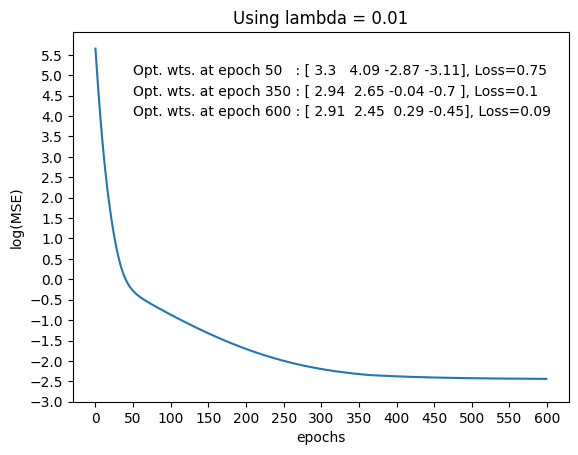

In [8]:
w_init = np.array([[-10, -10, -10, -10]], dtype=np.float32).reshape(-1, 1)
# w_init = np.array([[-10, -10]], dtype=np.float32).reshape(-1, 1)
num_epochs = 600
opt_algo = 'grad_descent'
# Backtracking line search parameters
lr = 0.1
eta = 0.1
tau = 0.1
# Gradient Descent parameters
# lr=0.1
plot = False

linear_model = LinearModel()
preds = linear_model.forward(dataset[:,:-1], w_init)
preds_hist = preds.reshape(-1, 1)
loss = loss_fn(dataset[:, -1], preds, w_init, lambda_reg=lambda_reg)
loss_hist = loss.reshape(-1, 1)
w_hist = deepcopy(w_init)
w_new = deepcopy(w_init)

for epoch in range(num_epochs):
    # w_grads = np.array([dl_dw1(dataset, preds, w_new, lambda_reg), 
    #                     dl_dw2(dataset, preds, w_new, lambda_reg)]).reshape(-1, 1)
    w_grads = np.array([dl_dw1(dataset, preds, w_new, lambda_reg), 
                        dl_dw2(dataset, preds, w_new, lambda_reg),
                        dl_dw3(dataset, preds, w_new, lambda_reg),
                        dl_dw4(dataset, preds, w_new, lambda_reg)]).reshape(-1, 1)
    if opt_algo == 'grad_descent':
        w_new -= lr * w_grads
    elif opt_algo == 'cood_descent':
        cood_choice = np.random.choice([0, 1], p=[0.5, 0.5])
        new_lr = lr
        w_temp = deepcopy(w_new)
        w_temp[cood_choice, 0] -= new_lr * w_grads[cood_choice, 0]
        while loss_fn(dataset[:, -1], preds, w_temp, lambda_reg=lambda_reg) > \
                loss_fn(dataset[:, -1], preds, w_new, lambda_reg=lambda_reg) - eta * new_lr * np.linalg.norm(w_grads, ord=2)**2:
            new_lr *= tau
            w_temp[cood_choice, 0] -= new_lr * w_grads[cood_choice, 0]
            preds = linear_model.forward(dataset[:,:-1], w_temp, save=False)
            w_grads = np.array([dl_dw1(dataset, preds, w_temp, lambda_reg), dl_dw2(dataset, preds, w_temp, lambda_reg)]).reshape(-1, 1)
        print(f'{epoch}/{num_epochs}, new_lr: {new_lr}')
        w_new = w_temp
    preds = linear_model.forward(dataset[:,:-1], w_new)
    preds_hist = np.hstack((preds_hist, preds.reshape(-1, 1)))
    loss = loss_fn(dataset[:, -1], preds, w_new, lambda_reg=lambda_reg)
    loss_hist = np.hstack((loss_hist, loss.reshape(-1, 1)))
    w_hist = np.hstack((w_hist, w_new))

plt.plot(range(num_epochs), np.log(loss_hist[:,:-1]).squeeze())
plt.ylabel('log(MSE)')
plt.xlabel('epochs')
plt.xticks(np.arange(0, num_epochs+1, 50))
plt.yticks(np.arange(-3, 6, 0.5))
plt.title(f'Using lambda = {lambda_reg}')
plt.text(50, 5, f'Opt. wts. at epoch 50   : {np.round(w_hist[:, 50], 2)}, Loss={np.round(loss_hist[:, 50].squeeze(), 2)}', dict(size=10))
plt.text(50, 4.5, f'Opt. wts. at epoch 350 : {np.round(w_hist[:, 350], 2)}, Loss={np.round(loss_hist[:, 350].squeeze(), 2)}', dict(size=10))
plt.text(50, 4, f'Opt. wts. at epoch 600 : {np.round(w_hist[:, 600], 2)}, Loss={np.round(loss_hist[:, 600].squeeze(), 2)}', dict(size=10))
plt.savefig(f'loss_curve_for_4_feats_w_l1_{lambda_str}.pdf')

print(w_hist[:,-1])
if features.shape[1] == 2:
    if plot:
        from plotly.subplots import make_subplots
        combined_plot = make_subplots(
            rows=1, cols=2,
            specs=[[{'type': 'surface'}, {'type': 'surface'}]],
            subplot_titles=('Loss Surface', f'y={w_hist[0, -1]:.2f}x1 + {w_hist[1, -1]:.2f}x2; Loss={np.round(loss_hist[:, -1].squeeze(), 2)}')
        )
        combined_plot.add_trace(go.Surface(
            x=w1_grid,
            y=w2_grid,
            z=pred_loss_surface,
            colorscale='Viridis',
            opacity=1.0,
            showscale=False,
            name='')
            )
        # Add the L1 norm surface
        combined_plot.add_trace(go.Surface(
            x=w1_grid,
            y=w2_grid,
            z=l1_reg_surface,
            colorscale='reds',
            opacity=1.0,
            showscale=False,
            name=''
        ))
        z_min = np.nanmin(pred_loss_surface)
        z_max = np.nanmax(pred_loss_surface)
        z = np.linspace(z_min, z_max, 100)
        combined_plot.add_trace(go.Scatter3d(
            x=[3]*len(z),
            y=[2]*len(z),
            z=z,
            mode='markers',
            marker=dict(
                size=1,
                color='black',
                opacity=1.0
            ),
            name=''
        ))
        combined_plot.add_trace(go.Scatter3d(
            x=w_hist[0, :],
            y=w_hist[1, :],
            z=[np.mean((dataset[:, -1] - preds_hist[:, i])**2) + 5 for i in range(preds_hist.shape[1])],
            mode='markers',
            marker=dict(
                size=3,
                color='red',
                opacity=1.0
            ),
            name='',
            showlegend=False),
            row=1, col=1
            )
        combined_plot.add_trace(go.Surface(
            x=x_grid,
            y=y_grid,
            z=w_hist[0, -1] * x_grid + w_hist[1, -1] * y_grid,
            colorscale=[[0, 'blue'], [1, 'blue']],
            opacity=0.5,
            showscale=False,
            name=''),
            row=1, col=2
            )
        combined_plot.add_trace(go.Scatter3d(
            x=dataset[:, 0],
            y=dataset[:, 1],
            z=target.flatten(),
            mode='markers',
            marker=dict(
                size=3,
                color='black',  # Set color to the third column
                opacity=1.0,
            ),
            name='',
            showlegend=False),
            row=1, col=2
        )
        combined_plot.update_layout(
            width=720,
            height=360,
            margin=dict(l=0, r=0, b=0, t=30),
            scene=dict(
                xaxis_title='w1',
                yaxis_title='w2',
                zaxis_title='MSE Loss'
            ),
            scene2=dict(
                xaxis_title='x1',
                yaxis_title='x2',
                zaxis_title='y'
            )
        )
        combined_plot.show()
        combined_plot.write_html('GD_path_with_l1_reg_w_4_feats.html')
